<a href="https://colab.research.google.com/github/raszeliga/Apresentacao-Dia-16/blob/main/Apresenta%C3%A7%C3%A3o_Dia_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://movingpandas.github.io/movingpandas-website/1-tutorials/2-computing-speed.html

In [1]:
pip install movingpandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 5.6 MB/s eta 0:00:00


In [2]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 1.3 MB/s eta 0:00:00


In [3]:
!pip install holoviews

In [4]:
pip install geoviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
  Attempting uninstall: panel
    Found existing installation: panel 1.3.8
    Uninstalling panel-1.3.8:
      Successfully uninstalled panel-1.3.8


In [5]:
pip install cartopy

In [6]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas
import holoviews as hv

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts

import warnings
warnings.filterwarnings('ignore')

opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))

mpd.show_versions()


MovingPandas 0.18.1

SYSTEM INFO
-----------
python     : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
executable : /usr/bin/python3
machine    : Linux-6.1.85+-x86_64-with-glibc2.35

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.6.4
GDAL data dir: /usr/local/lib/python3.10/dist-packages/fiona/gdal_data
PROJ       : 9.3.0
PROJ data dir: /usr/local/lib/python3.10/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.13.2
pandas     : 2.0.3
fiona      : 1.9.6
numpy      : 1.25.2
shapely    : 2.0.4
rtree      : 1.2.0
pyproj     : 3.6.1
matplotlib : 3.7.1
mapclassify: None
geopy      : 2.3.0
holoviews  : 1.17.1
hvplot     : 0.10.0
geoviews   : 1.12.0
stonesoup  : None


In [10]:
gdf4326 = read_file('https://github.com/raszeliga/Apresentacao-Dia-16/blob/main/GPS_Driver_A2_reduzido_31982.gpkg')
tc4326 = mpd.TrajectoryCollection(gdf4326, 'trip', t='t')

ERROR:fiona._env:`/vsicurl/https://github.com/raszeliga/Apresentacao-Dia-16/blob/main/GPS_Driver_A2_reduzido_31982.gpkg' not recognized as a supported file format.


DriverError: '/vsicurl/https://github.com/raszeliga/Apresentacao-Dia-16/blob/main/GPS_Driver_A2_reduzido_31982.gpkg' not recognized as a supported file format.

In [ ]:
my_traj4326 = tc4326.trajectories[0]

In [ ]:
my_traj4326.df

,driver,trip,long,lar,data,time_acum,spd,heading,geometry
t,,,,,,,,,
2024-04-18 13:07:25,A,A2,-49.234101,-25.434756,2019-08-24,0,0.1609,0.0,POINT (-49.23410 -25.43476)
2024-04-18 13:07:26,A,A2,-49.234101,-25.434756,2019-08-24,1,0.0000,0.0,POINT (-49.23410 -25.43476)
2024-04-18 13:07:27,A,A2,-49.234102,-25.434757,2019-08-24,2,0.1609,199.9,POINT (-49.23410 -25.43476)
2024-04-18 13:07:28,A,A2,-49.234102,-25.434757,2019-08-24,3,0.1609,180.0,POINT (-49.23410 -25.43476)
2024-04-18 13:07:29,A,A2,-49.234102,-25.434758,2019-08-24,4,0.1609,196.8,POINT (-49.23410 -25.43476)
...,...,...,...,...,...,...,...,...,...
2024-04-18 13:15:26,A,A2,-49.245003,-25.423120,2019-08-24,481,0.0000,137.9,POINT (-49.24500 -25.42312)
2024-04-18 13:15:27,A,A2,-49.245004,-25.423120,2019-08-24,482,0.1609,270.0,POINT (-49.24500 -25.42312)
2024-04-18 13:15:28,A,A2,-49.245004,-25.423120,2019-08-24,483,0.1609,317.9,POINT (-49.24500 -25.42312)


<Axes: >

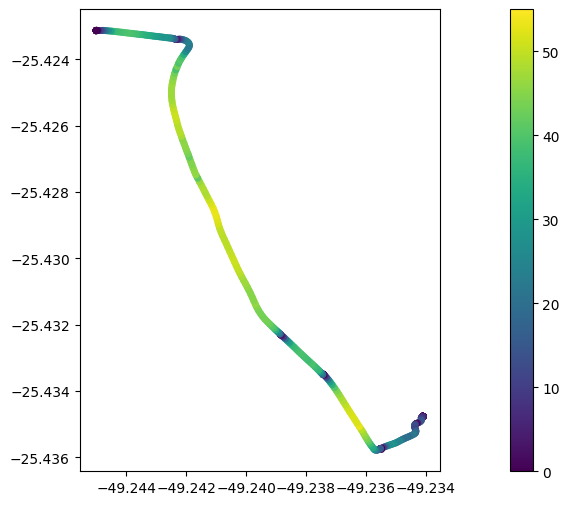

In [ ]:
my_traj4326.plot(column='spd', linewidth=5, capstyle='round', figsize=(18,6), legend=True, vmax=55)

In [ ]:
my_traj4326.add_speed(overwrite=True, name="speed_kph", units=("km", "h"))
my_traj4326.df

,driver,trip,long,lar,data,time_acum,spd,heading,geometry,speed_kph
t,,,,,,,,,,
2024-04-18 13:07:25,A,A2,-49.234101,-25.434756,2019-08-24,0,0.1609,0.0,POINT (-49.23410 -25.43476),0.000000
2024-04-18 13:07:26,A,A2,-49.234101,-25.434756,2019-08-24,1,0.0000,0.0,POINT (-49.23410 -25.43476),0.000000
2024-04-18 13:07:27,A,A2,-49.234102,-25.434757,2019-08-24,2,0.1609,199.9,POINT (-49.23410 -25.43476),0.538688
2024-04-18 13:07:28,A,A2,-49.234102,-25.434757,2019-08-24,3,0.1609,180.0,POINT (-49.23410 -25.43476),0.000000
2024-04-18 13:07:29,A,A2,-49.234102,-25.434758,2019-08-24,4,0.1609,196.8,POINT (-49.23410 -25.43476),0.398806
...,...,...,...,...,...,...,...,...,...,...
2024-04-18 13:15:26,A,A2,-49.245003,-25.423120,2019-08-24,481,0.0000,137.9,POINT (-49.24500 -25.42312),0.362166
2024-04-18 13:15:27,A,A2,-49.245004,-25.423120,2019-08-24,482,0.1609,270.0,POINT (-49.24500 -25.42312),0.362166
2024-04-18 13:15:28,A,A2,-49.245004,-25.423120,2019-08-24,483,0.1609,317.9,POINT (-49.24500 -25.42312),0.000000


In [ ]:
gdf31982 = read_file('/content/GPS_Driver_A2_reduzido_31982.gpkg')
tc31982 = mpd.TrajectoryCollection(gdf31982, 'trip', t='t')

In [ ]:
my_traj31982 = tc31982.trajectories[0]

In [ ]:
my_traj31982.add_speed(overwrite=True, name="speed_kph", units=("km", "h"))
my_traj31982.df

,driver,trip,long,lar,data,time_acum,spd,heading,geometry,speed_kph
t,,,,,,,,,,
2024-04-18 13:07:25,A,A2,-49.234101,-25.434756,2019-08-24,0,0.1609,0.0,POINT (677582.068 7185735.353),0.000000
2024-04-18 13:07:26,A,A2,-49.234101,-25.434756,2019-08-24,1,0.0000,0.0,POINT (677582.068 7185735.353),0.000000
2024-04-18 13:07:27,A,A2,-49.234102,-25.434757,2019-08-24,2,0.1609,199.9,POINT (677581.966 7185735.244),0.538683
2024-04-18 13:07:28,A,A2,-49.234102,-25.434757,2019-08-24,3,0.1609,180.0,POINT (677581.966 7185735.244),0.000000
2024-04-18 13:07:29,A,A2,-49.234102,-25.434758,2019-08-24,4,0.1609,196.8,POINT (677581.964 7185735.133),0.398802
...,...,...,...,...,...,...,...,...,...,...
2024-04-18 13:15:26,A,A2,-49.245003,-25.423120,2019-08-24,481,0.0000,137.9,POINT (676502.482 7187038.725),0.362160
2024-04-18 13:15:27,A,A2,-49.245004,-25.423120,2019-08-24,482,0.1609,270.0,POINT (676502.381 7187038.726),0.362160
2024-04-18 13:15:28,A,A2,-49.245004,-25.423120,2019-08-24,483,0.1609,317.9,POINT (676502.381 7187038.726),0.000000


<Axes: >

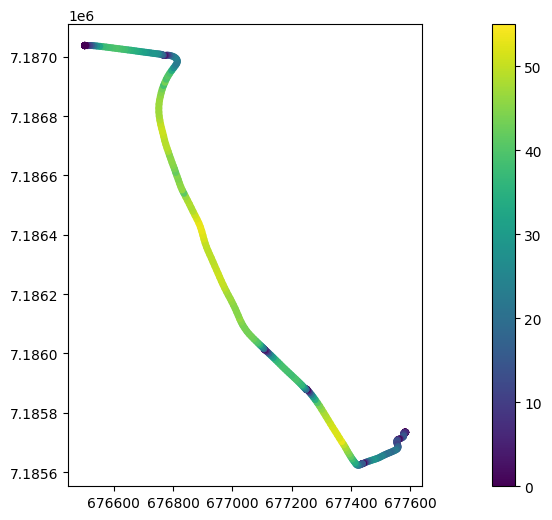

In [ ]:
my_traj31982.plot(column='spd', linewidth=5, capstyle='round', figsize=(18,6), legend=True, vmax=55)

<Axes: >

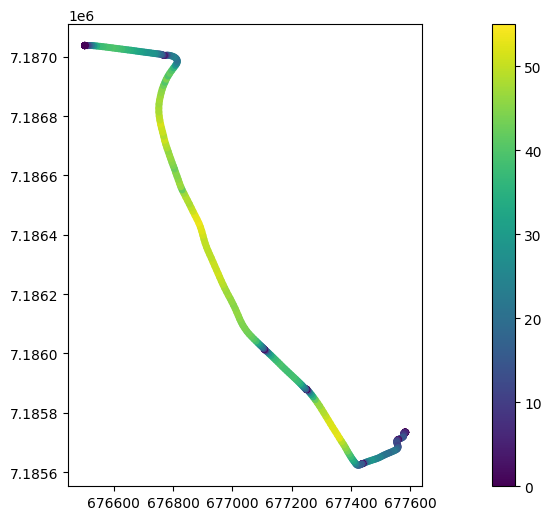

In [ ]:
my_traj31982.plot(column='speed_kph', linewidth=5, capstyle='round', figsize=(18,6), legend=True, vmax=55)

In [ ]:
import cartopy
import geoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
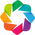

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]   (spd)
   .Points.I :Points   [Longitude,Latitude]   (spd,triangle_angle)

In [ ]:
hv.extension('bokeh')
traj_plot = my_traj31982.hvplot(c='spd', clim=(0,55), line_width=7.0, tiles='CartoLight', cmap='Viridis', colorbar=True)
traj_plot

https://movingpandas.github.io/movingpandas-website/1-tutorials/4-exporting-trajectories.html

Convert to a point GeoDataFrame

In [ ]:
tc = mpd.TrajectoryCollection(gdf31982, 'trip', t='t')
tc

TrajectoryCollection with 1 trajectories

In [ ]:
tc.to_point_gdf()

,driver,trip,long,lar,data,time_acum,spd,heading,geometry
t,,,,,,,,,
2024-04-17 13:07:25,A,A2,-49.234101,-25.434756,2019-08-24,0,0.1609,0.0,POINT (677582.068 7185735.353)
2024-04-17 13:07:26,A,A2,-49.234101,-25.434756,2019-08-24,1,0.0000,0.0,POINT (677582.068 7185735.353)
2024-04-17 13:07:27,A,A2,-49.234102,-25.434757,2019-08-24,2,0.1609,199.9,POINT (677581.966 7185735.244)
2024-04-17 13:07:28,A,A2,-49.234102,-25.434757,2019-08-24,3,0.1609,180.0,POINT (677581.966 7185735.244)
2024-04-17 13:07:29,A,A2,-49.234102,-25.434758,2019-08-24,4,0.1609,196.8,POINT (677581.964 7185735.133)
...,...,...,...,...,...,...,...,...,...
2024-04-17 13:15:26,A,A2,-49.245003,-25.423120,2019-08-24,481,0.0000,137.9,POINT (676502.482 7187038.725)
2024-04-17 13:15:27,A,A2,-49.245004,-25.423120,2019-08-24,482,0.1609,270.0,POINT (676502.381 7187038.726)
2024-04-17 13:15:28,A,A2,-49.245004,-25.423120,2019-08-24,483,0.1609,317.9,POINT (676502.381 7187038.726)


In [ ]:
tc.to_line_gdf()

,driver,trip,long,lar,data,time_acum,spd,heading,t,prev_t,geometry
0,A,A2,-49.234101,-25.434756,2019-08-24,1,0.0000,0.0,2024-04-17 13:07:26,2024-04-17 13:07:25,"LINESTRING (677582.068 7185735.353, 677582.068..."
1,A,A2,-49.234102,-25.434757,2019-08-24,2,0.1609,199.9,2024-04-17 13:07:27,2024-04-17 13:07:26,"LINESTRING (677582.068 7185735.353, 677581.966..."
2,A,A2,-49.234102,-25.434757,2019-08-24,3,0.1609,180.0,2024-04-17 13:07:28,2024-04-17 13:07:27,"LINESTRING (677581.966 7185735.244, 677581.966..."
3,A,A2,-49.234102,-25.434758,2019-08-24,4,0.1609,196.8,2024-04-17 13:07:29,2024-04-17 13:07:28,"LINESTRING (677581.966 7185735.244, 677581.964..."
4,A,A2,-49.234102,-25.434758,2019-08-24,5,0.0000,204.3,2024-04-17 13:07:30,2024-04-17 13:07:29,"LINESTRING (677581.964 7185735.133, 677581.964..."
...,...,...,...,...,...,...,...,...,...,...,...
480,A,A2,-49.245003,-25.423120,2019-08-24,481,0.0000,137.9,2024-04-17 13:15:26,2024-04-17 13:15:25,"LINESTRING (676502.381 7187038.726, 676502.482..."
481,A,A2,-49.245004,-25.423120,2019-08-24,482,0.1609,270.0,2024-04-17 13:15:27,2024-04-17 13:15:26,"LINESTRING (676502.482 7187038.725, 676502.381..."
482,A,A2,-49.245004,-25.423120,2019-08-24,483,0.1609,317.9,2024-04-17 13:15:28,2024-04-17 13:15:27,"LINESTRING (676502.381 7187038.726, 676502.381..."
483,A,A2,-49.245004,-25.423120,2019-08-24,484,0.0000,42.1,2024-04-17 13:15:29,2024-04-17 13:15:28,"LINESTRING (676502.381 7187038.726, 676502.381..."


In [ ]:
tc.to_traj_gdf(wkt=True)

,trip,start_t,end_t,geometry,length,direction,wkt
0,A2,2024-04-17 13:07:25,2024-04-17 13:15:30,"LINESTRING (677582.068 7185735.353, 677582.068...",2138.141529,320.362357,LINESTRING M (677582.0679077761 7185735.353016...


In [ ]:
export_gdf = tc.to_traj_gdf(wkt=True)
export_gdf.to_file("trajetoria.gpkg", layer='trajectories', driver="GPKG")

<Axes: >

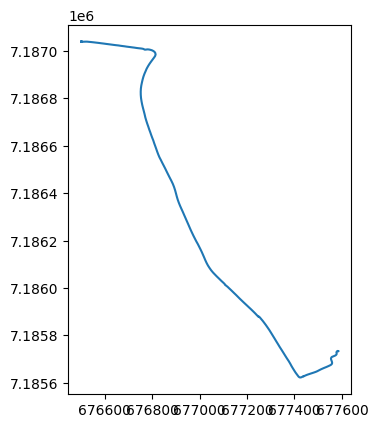

In [ ]:
read_file('trajetoria.gpkg').plot()

https://movingpandas.github.io/movingpandas-website/1-tutorials/8-detecting-stops.html

In the MovingPandas TrajectoryStopDetector implementation, a stop is detected if the movement stays within an area of specified size for at least the specified duration

In [ ]:
gdf = read_file('/content/GPS_Driver_A21_reduzido_4326.gpkg')
tc = mpd.TrajectoryCollection(gdf, 'trip', t='t')

Stop detection with a single Trajectory

In [ ]:
my_traj = tc.trajectories[0]
my_traj

Trajectory A21 (2024-04-18 07:47:17 to 2024-04-18 08:04:09) | Size: 1013 | Length: 6064.4m
Bounds: (-49.333824, -25.441524, -49.28242, -25.435633)
LINESTRING (-49.331741 -25.437809, -49.331741 -25.437809, -49.331741 -25.43781, -49.33174 -25.437811

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
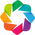

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:
hv.extension('bokeh')
traj_plot = my_traj.hvplot(title='Trajectory {}'.format(my_traj.id), line_width=7.0, tiles='CartoLight', color='slategray').opts(width=800, height=600, xaxis=None, yaxis=None)
traj_plot

In [ ]:
detector = mpd.TrajectoryStopDetector(my_traj)

In [ ]:
tempo = 60
distancia = 200

In [ ]:
%%time
stop_time_ranges = detector.get_stop_time_ranges(min_duration = timedelta(seconds = tempo), max_diameter = distancia)

CPU times: user 932 ms, sys: 4.83 ms, total: 937 ms
Wall time: 943 ms


In [ ]:
for x in stop_time_ranges:
    print(x)

Traj A21: 2024-04-18 07:49:35 - 2024-04-18 07:50:37 (duration: 0 days 00:01:02)
Traj A21: 2024-04-18 07:50:38 - 2024-04-18 07:51:44 (duration: 0 days 00:01:06)
Traj A21: 2024-04-18 07:53:49 - 2024-04-18 07:54:51 (duration: 0 days 00:01:02)
Traj A21: 2024-04-18 07:59:09 - 2024-04-18 08:00:11 (duration: 0 days 00:01:02)
Traj A21: 2024-04-18 08:00:12 - 2024-04-18 08:01:36 (duration: 0 days 00:01:24)
Traj A21: 2024-04-18 08:02:24 - 2024-04-18 08:03:40 (duration: 0 days 00:01:16)


In [ ]:
%%time
stop_points = detector.get_stop_points(min_duration=timedelta(seconds = tempo), max_diameter = distancia)

CPU times: user 1.07 s, sys: 10.8 ms, total: 1.08 s
Wall time: 1.08 s


In [ ]:
stop_points

,geometry,start_time,end_time,traj_id,duration_s
stop_id,,,,,
A21_2024-04-18 07:49:35,POINT (-49.32418 -25.43881),2024-04-18 07:49:35,2024-04-18 07:50:37,A21,62.0
A21_2024-04-18 07:50:38,POINT (-49.32273 -25.43887),2024-04-18 07:50:38,2024-04-18 07:51:44,A21,66.0
A21_2024-04-18 07:53:49,POINT (-49.30814 -25.43757),2024-04-18 07:53:49,2024-04-18 07:54:51,A21,62.0
A21_2024-04-18 07:59:09,POINT (-49.29144 -25.43899),2024-04-18 07:59:09,2024-04-18 08:00:11,A21,62.0
A21_2024-04-18 08:00:12,POINT (-49.28975 -25.43829),2024-04-18 08:00:12,2024-04-18 08:01:36,A21,84.0
A21_2024-04-18 08:02:24,POINT (-49.28319 -25.43576),2024-04-18 08:02:24,2024-04-18 08:03:40,A21,76.0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
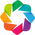

:Overlay
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Path.I    :Path   [Longitude,Latitude]
   .Points.I  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II :Points   [Longitude,Latitude]   (duration_s)

In [ ]:
hv.extension('bokeh')
stop_point_plot = traj_plot * stop_points.hvplot(geo=True, size='duration_s', color='deeppink')
stop_point_plot

In [ ]:
%%time
stops = detector.get_stop_segments(min_duration=timedelta(seconds = tempo), max_diameter = distancia)

CPU times: user 1.6 s, sys: 3.82 ms, total: 1.6 s
Wall time: 1.66 s


In [ ]:
stops

TrajectoryCollection with 6 trajectories

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
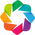

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Path.I      :Path   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II   :Points   [Longitude,Latitude]   (duration_s)
   .Path.II     :Path   [Longitude,Latitude]
   .Path.III    :Path   [Longitude,Latitude]
   .Path.IV     :Path   [Longitude,Latitude]
   .Path.V      :Path   [Longitude,Latitude]
   .Path.VI     :Path   [Longitude,Latitude]
   .Path.VII    :Path   [Longitude,Latitude]
   .Points.III  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.V    :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:
hv.extension('bokeh')
stop_segment_plot = stop_point_plot * stops.hvplot(line_width=7.0, tiles=None, color='orange')
stop_segment_plot

In [ ]:
%%time
split = mpd.StopSplitter(my_traj).split(min_duration=timedelta(seconds = tempo), max_diameter = distancia)

CPU times: user 1.09 s, sys: 10.8 ms, total: 1.1 s
Wall time: 1.11 s


In [ ]:
split

TrajectoryCollection with 7 trajectories

In [ ]:
split.to_traj_gdf()

,trip,start_t,end_t,geometry,length,direction
0,A21_2024-04-18 07:47:17,2024-04-18 07:47:17,2024-04-18 07:49:35,"LINESTRING (-49.33174 -25.43781, -49.33174 -25...",1163.826790,98.083936
1,A21_2024-04-18 07:50:37,2024-04-18 07:50:37,2024-04-18 07:50:38,"LINESTRING (-49.32393 -25.43882, -49.32386 -25...",7.083774,96.319005
2,A21_2024-04-18 07:51:44,2024-04-18 07:51:44,2024-04-18 07:53:49,"LINESTRING (-49.32199 -25.43898, -49.32187 -25...",1306.496726,86.180922
3,A21_2024-04-18 07:54:51,2024-04-18 07:54:51,2024-04-18 07:59:09,"LINESTRING (-49.30810 -25.43753, -49.30805 -25...",1771.890974,99.205693
4,A21_2024-04-18 08:00:11,2024-04-18 08:00:11,2024-04-18 08:00:12,"LINESTRING (-49.29144 -25.43899, -49.29143 -25...",1.237370,63.281672
5,A21_2024-04-18 08:01:36,2024-04-18 08:01:36,2024-04-18 08:02:24,"LINESTRING (-49.28963 -25.43825, -49.28958 -25...",510.150679,66.483099
6,A21_2024-04-18 08:03:40,2024-04-18 08:03:40,2024-04-18 08:04:09,"LINESTRING (-49.28314 -25.43576, -49.28311 -25...",104.774549,116.132378


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
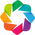

:Layout
   .Overlay.I  :Overlay
      .WMTS.I      :WMTS   [Longitude,Latitude]
      .Path.I      :Path   [Longitude,Latitude]
      .Points.I    :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.II   :Points   [Longitude,Latitude]   (duration_s)
      .Path.II     :Path   [Longitude,Latitude]
      .Path.III    :Path   [Longitude,Latitude]
      .Path.IV     :Path   [Longitude,Latitude]
      .Path.V      :Path   [Longitude,Latitude]
      .Path.VI     :Path   [Longitude,Latitude]
      .Path.VII    :Path   [Longitude,Latitude]
      .Points.III  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.V    :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle)
   .Overlay.II :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Path.I     :Path   [Longitude,Latitude]
      .Path.II    :Path   [Longitude,Latitude]
      .Path.III   :Path   [Longitude,Latitude]
      .Path.IV    :Path   [Longitude,Latitude]
      .Path.V     :Path   [Longitude,Latitude]
      .Path.VI    :Path   [Longitude,Latitude]
      .Path.VII   :Path   [Longitude,Latitude]
      .Points.I   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.II  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.III :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.IV  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.V   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VI  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VII :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:
hv.extension('bokeh')
stop_segment_plot + split.hvplot(title='Trajectory {} split at stops'.format(my_traj.id), line_width=7.0, tiles='CartoLight')